# 1、近似算法

## 1.1 分段聚合近似 PAA  
  
pyts.approximation.PiecewiseAggregateApproximation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PiecewiseAggregateApproximation
from pyts.utils import segmentation
import pandas as pd
%matplotlib inline

In [7]:
# PAA
n_samples, n_timestamps = 2, 10

rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)
print( 'X: ',X)

windows_size = 2
paa = PiecewiseAggregateApproximation(window_size=windows_size)
X_paa = paa.transform(X)
print('X_paa: ',X_paa)

seg = segmentation(10, window_size=3, overlapping=False)
seg

X:  [[-0.27071232  0.10484805  0.25052782 -0.92519997  0.56714366 -1.04018022
  -0.15367595  0.78985181 -1.22621585 -0.94800699]
 [-0.56965394 -0.97715021 -0.77063171 -0.03371129 -1.03285925  1.14242738
  -0.60977801  1.46941639  1.49267884  0.70712523]]
X_paa:  [[-0.08293214 -0.33733607 -0.23651828  0.31808793 -1.08711142]
 [-0.77340208 -0.4021715   0.05478407  0.42981919  1.09990203]]


(array([0, 2, 5, 7], dtype=int64), array([ 2,  5,  7, 10], dtype=int64), 4)

## 1.2 符号聚合近似 SAX  
Symbolic Aggregate approXimation

In [8]:
from pyts.approximation import SymbolicAggregateApproximation
X = [[0, 4, 2, 1, 7, 6, 3, 5], [2, 5, 4, 5, 3, 4, 2, 3]]
sax = SymbolicAggregateApproximation()
print(sax.transform(X))

[['a' 'c' 'b' 'a' 'd' 'd' 'b' 'c']
 ['a' 'd' 'c' 'd' 'b' 'c' 'a' 'b']]


示例：

In [9]:
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation

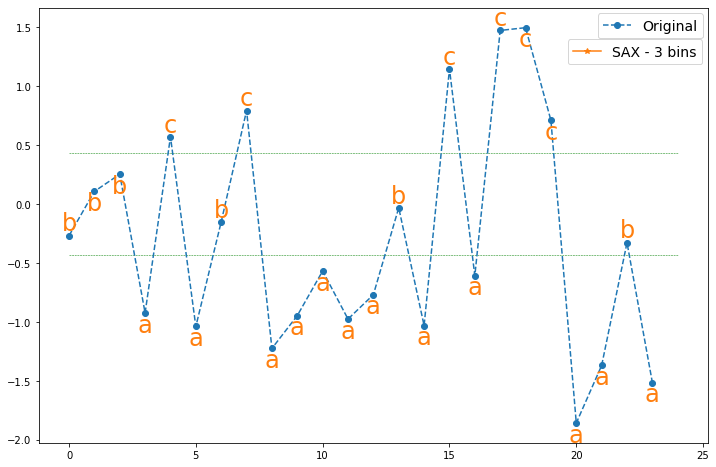

In [10]:
n_samples, n_timestamps = 100, 24
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

n_bins = 3
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
X_sax = sax.fit_transform(X)

bins = norm.ppf(np.linspace(0, 1, n_bins+1)[1:-1])

# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

plt.figure(figsize=(12, 8))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=24, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=14, loc=(0.79, 0.87))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.835, 0.93), fontsize=14)
plt.show()

## 1.3 离散傅里叶变换 DFT  
Discrete Fourier Transform.

In [11]:
from pyts.approximation import DiscreteFourierTransform
from datasets import load_gunpoint

In [12]:
X, _, _, _ = load_gunpoint(return_X_y=True)
transformer = DiscreteFourierTransform(n_coefs=4)
X_new = transformer.fit_transform(X)
X_new.shape

(50, 4)

In [13]:
X.shape

(50, 150)

示例：

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import DiscreteFourierTransform

In [15]:
# parameters
n_samples, n_timestamps = 100, 48

# 构建随机数据集，100个样本时间序列，长度为48的单变量时间序列
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)
print('X[0]: ', X[0,:5])


X[0]:  [-0.27071232  0.10484805  0.25052782 -0.92519997  0.56714366]


In [16]:
# 傅里叶变换
n_coefs = 30
dft = DiscreteFourierTransform(n_coefs=n_coefs, norm_mean=False, norm_std=False)
X_dft = dft.fit_transform(X)
print('X_dft[0]:',X_dft[0, 0:5])

X_dft[0]: [-8.43822964  1.88611944  0.73708526  4.82725377  1.68090125]


In [17]:
# 计算逆变换
if n_coefs % 2 == 0:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                        np.zeros((n_samples, ))]
    ]
else:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs + 1, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
    ]
X_irfft = np.fft.irfft(X_dft_new, n_timestamps)

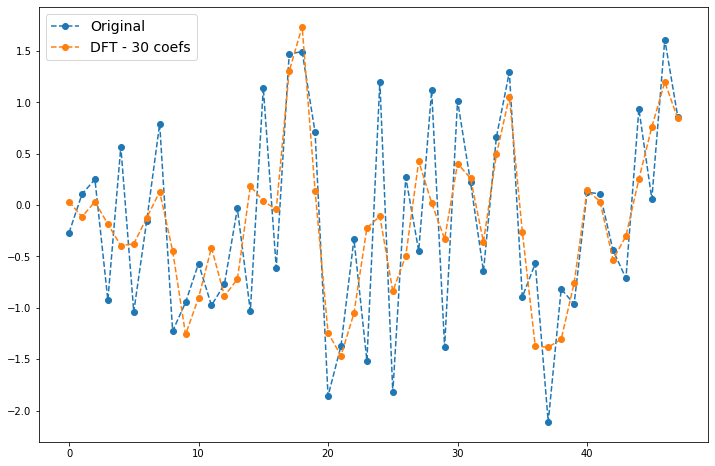

In [18]:
# Show the results for the first time series
plt.figure(figsize=(12, 8))
plt.plot(X[0], 'o--', label='Original')
plt.plot(X_irfft[0], 'o--', label='DFT - {0} coefs'.format(n_coefs))
plt.legend(loc='best', fontsize=14)
plt.show()

## 1.3 多重系数分箱 MCB
pyts.approximation.MultipleCoefficientBinning

In [19]:
from pyts.approximation import MultipleCoefficientBinning
X = [[0, 4],
    [2, 7],
    [1, 6],
    [3, 5]]
mcb = MultipleCoefficientBinning(n_bins=2)
mcb.fit_transform(X)

array([['a', 'a'],
       ['b', 'b'],
       ['a', 'b'],
       ['b', 'a']], dtype='<U1')

示例：

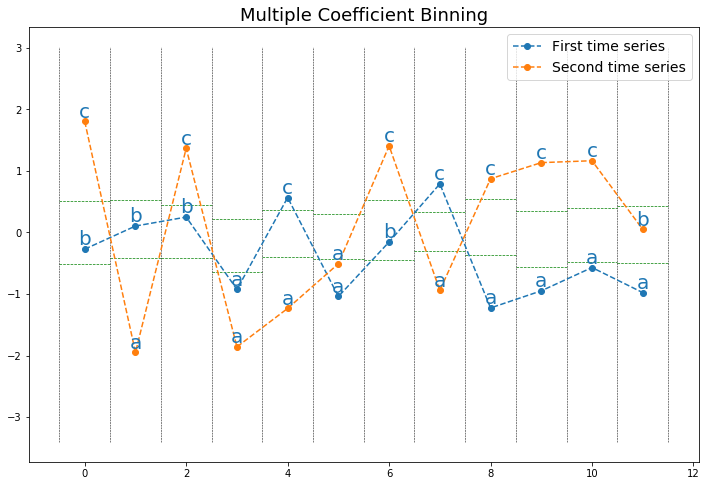

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import MultipleCoefficientBinning

# parameters:
n_samples, n_timestamps = 100, 12

# toy dadaset:
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# MCB transformation
n_bins = 3
mcb = MultipleCoefficientBinning(n_bins=n_bins, strategy='quantile')
X_mcb = mcb.fit_transform(X)

# show the results for tow time series
plt.figure(figsize=(12, 8))
plt.plot(X[0], 'o--', label='First time series')
for x, y, s in zip(range(n_timestamps), X[0], X_mcb[0]):
    plt.text(x, y, s, ha='center', va='bottom', fontsize=20, color='C0')
plt.plot(X[5], 'o--', label='Second time series')
for x, y, s in zip(range(n_timestamps), X[5], X_mcb[5]):
    plt.text(x, y, s, ha='center', va='bottom', fontsize=20, color='C0')
plt.hlines(mcb.bin_edges_.T, np.arange(n_timestamps) - 0.5,
           np.arange(n_timestamps) + 0.5, color='g',
           linestyles='--', linewidth=0.7)
plt.vlines(np.arange(n_timestamps + 1) - 0.5, X.min(), X.max(),
           linestyles='--', linewidth=0.5)

plt.legend(loc='best', fontsize=14)
plt.title("Multiple Coefficient Binning", fontsize=18)
plt.show()

## 1.4 符号傅里叶近似 SFA
Symbolic Fourier Approximation. 

In [21]:
from pyts.approximation import SymbolicFourierApproximation
from datasets import load_gunpoint
X, _, _, _ = load_gunpoint(return_X_y=True)
sfa = SymbolicFourierApproximation(n_coefs=4)
X_new = sfa.fit_transform(X)
X_new.shape

(50, 4)

In [22]:
sfa.bin_edges_

array([[-1.97225000e-07, -1.20000002e-08,  1.06750000e-07],
       [-9.73449656e+01, -9.02674864e+01, -8.33044698e+01],
       [-1.56898873e+01, -6.91758413e+00,  4.51341787e+00],
       [-3.05941049e+00,  1.49171134e+01,  4.98421497e+01]])

In [23]:
sfa.support_

array([0, 1, 2, 3])

In [24]:
X.shape

(50, 150)

# 2、词袋算法
pyts.bag_of_words.BagOfWords

In [25]:
from pyts.bag_of_words import BagOfWords
X = [['a', 'a', 'b', 'a', 'b', 'b', 'b', 'b', 'a'],
     ['a', 'b', 'c', 'c', 'c', 'c', 'a', 'a', 'c']]
bow = BagOfWords(window_size=2)
print(bow.transform(X))

bow = BagOfWords(window_size=2, numerosity_reduction=False)
bow.transform(X)



['aa ab ba ab bb ba' 'ab bc cc ca aa ac']


array(['aa ab ba ab bb bb bb ba', 'ab bc cc cc cc ca aa ac'], dtype='<U23')

示例：

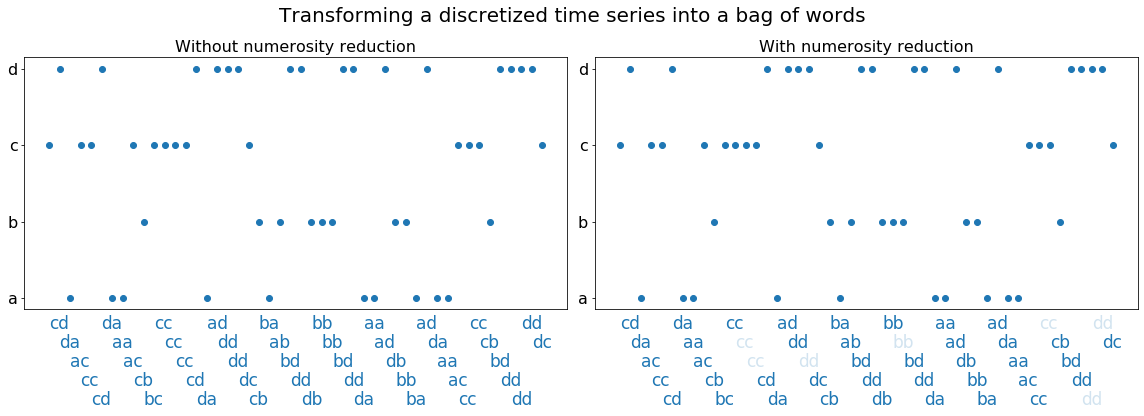

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.bag_of_words import BagOfWords
# parameters:
n_samples, n_timestamps = 100, 48
n_bins = 4

# toy dataset
rng = np.random.RandomState(42)
alphabet = np.array(['a', 'b', 'c', 'd'])
X_ordinal = rng.randint(n_bins, size=(n_samples, n_timestamps))
X_alphabet = alphabet[X_ordinal]

# bag of words transformatiom
bow = BagOfWords(window_size=2, numerosity_reduction=False)
X_bow = bow.transform(X_alphabet)
words = np.array(X_bow[0].split(' '))
different_words_idx = np.r_[True, words[1:] != words[:-1]]

# show the results
plt.figure(figsize=(16, 7))
plt.suptitle('Transforming a discretized time series into a bag of words',
             fontsize=20, y=0.9)

plt.subplot(121)
plt.plot(X_ordinal[0], 'o', scalex=0.2)
plt.yticks(np.arange(4), alphabet)
plt.xticks([], [])
plt.yticks(fontsize=16)
plt.title('Without numerosity reduction', fontsize=16)

for i, word in enumerate(words):
    plt.text(i, - 0.4 - (i % 5) / 4, word, fontsize=17, color='C0')

plt.subplot(122)
plt.plot(X_ordinal[0], 'o')
plt.yticks(np.arange(4), alphabet)
plt.xticks([], [])
plt.yticks(fontsize=16)
plt.title('With numerosity reduction', fontsize=16)

for i, (word, different_word) in enumerate(zip(words, different_words_idx)):
    if different_word:
        plt.text(i, - 0.4 - (i % 5) / 4, word, fontsize=17, color='C0')
    else:
        plt.text(i, - 0.4 - (i % 5) / 4, word, fontsize=17, color='C0',
                 alpha=0.2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3, top=0.8)
plt.show()


# 3、分类算法
pyts.classification
## 3.1、K最近邻分类器
pyts.classification.KNeighborsClassifier

In [27]:
from pyts.classification import KNeighborsClassifier
from datasets import load_gunpoint
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9133333333333333

## 3.2 基于SAX-VSM表示和TF-IDF统计的分类器
Classifier based on SAX-VSM representation and tf-idf statistics.  
pyts.classification.SAXVSM

In [28]:
from pyts.classification import SAXVSM
from datasets import load_gunpoint
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)
clf = SAXVSM(window_size=34, sublinear_tf=False, use_idf=False)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.76

示例：

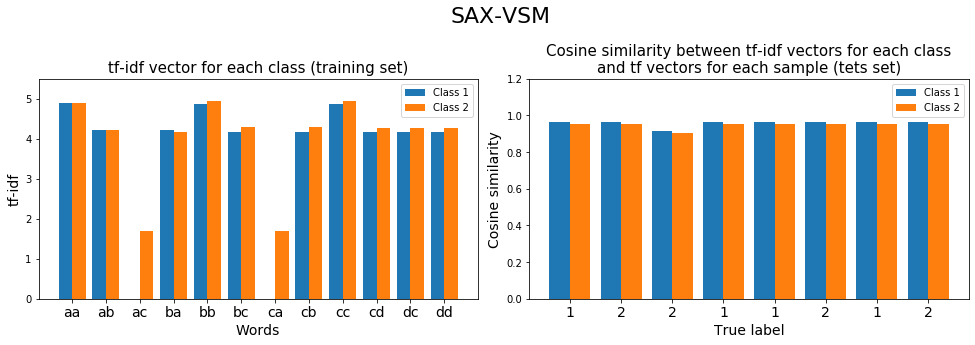

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.classification import SAXVSM
from datasets import load_gunpoint

# toy dataset
X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

# SAXVSM transformation
saxvsm = SAXVSM(n_bins=4, strategy='uniform', window_size=2, sublinear_tf=True)
saxvsm.fit(X_train, y_train)
tfidf = saxvsm.tfidf_
vocabulary_length = len(saxvsm.vocabulary_)
X_new = saxvsm.decision_function(X_test)

# Visualize the transformation
plt.figure(figsize=(14, 5))
width = 0.4

plt.subplot(121)
plt.bar(np.arange(vocabulary_length) - width / 2, tfidf[0],
        width=width, label='Class 1')
plt.bar(np.arange(vocabulary_length) + width / 2, tfidf[1],
        width=width, label='Class 2')
plt.xticks(np.arange(vocabulary_length),
           np.vectorize(saxvsm.vocabulary_.get)(np.arange(vocabulary_length)),
           fontsize=14)
plt.ylim((0, 5.5))
plt.xlabel("Words", fontsize=14)
plt.ylabel("tf-idf", fontsize=14)
plt.title("tf-idf vector for each class (training set)", fontsize=15)
plt.legend(loc='best')

plt.subplot(122)
n_samples_plot = 8
plt.bar(np.arange(n_samples_plot) - width / 2, X_new[:n_samples_plot, 0],
        width=width, label='Class 1')
plt.bar(np.arange(n_samples_plot) + width / 2, X_new[:n_samples_plot, 1],
        width=width, label='Class 2')
plt.xticks(np.arange(n_samples_plot), y_test[:n_samples_plot], fontsize=14)
plt.ylim((0, 1.2))
plt.xlabel("True label", fontsize=14)
plt.ylabel("Cosine similarity", fontsize=14)
plt.title(("Cosine similarity between tf-idf vectors for each class\n"
           "and tf vectors for each sample (tets set)"), fontsize=15)
plt.legend(loc='best')

plt.suptitle("SAX-VSM", y=0.95, fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

## 3.3 Bag-of-SFA Symbols in Vector Space
pyts.classification.BOSSVS